- Neighborhood: Physical locations within Ames city limits

Goal

1. LotFrontage: Linear feet of street connected to property
1. LotArea: Lot size in square feet

1. MSSubClass: The building class
1. BsmtQual: Height of the basement

1. TotalBsmtSF: Total square feet of basement area
1. GrLivArea: Above grade (ground) living area square feet

1. FullBath: Full bathrooms above grade
1. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

1. GarageType: Garage location
1. GarageCars: Size of garage in car capacity
  - GarageArea: Size of garage in square feet
  - These two are highly correlated

Strech Goal
1. HeatingQC: Heating quality and condition


Steps
1. Clean up data - fill in the blanks, remove outliers (within 2 std div)
2. Group the data by neighborhood
3. Test the effect of each attribute individually to see which on has the higher correlation to price. Compare the mean between the highest and lowst of each group and maybe a heatmap.
4. (Group) look across all attributes


- YearBuilt: Original construction date
  - YearRemodAdd: Remodel date
  - GarageYrBlt
  - Take the maximum of the above two
  - Use this to adjust the price to the same baseline


In [ ]:
pip install pingouin

In [ ]:
# Imports and configurations

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pingouin as pg

df = pd.read_csv('https://raw.githubusercontent.com/jackal0206/public_files/main/train_adjusted.csv')

<Axes: xlabel='HeatingQC', ylabel='AdjSalePrice'>

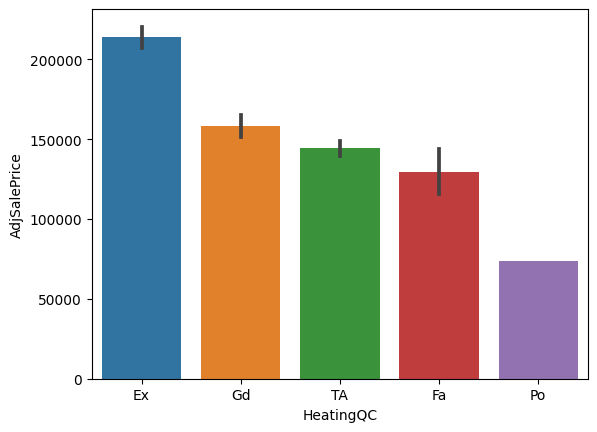

In [ ]:
df2 = df[['MSSubClass', 'LotFrontage', 'LotArea', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea', 'GarageType', 'GarageCars', 'FullBath', 'TotRmsAbvGrd', 'SalePrice', 'AdjSalePrice']]
rtn = pd.DataFrame()

#for col in ['MSSubClass', 'LotFrontage', 'LotArea', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea', 'GarageType', 'GarageCars', 'FullBath', 'TotRmsAbvGrd']:
#  print(pg.anova(dv='AdjSalePrice', between=[col], data=df2))

sns.barplot(data=df, x='HeatingQC', y='AdjSalePrice')

In [ ]:
df[df['OverallQual'] != df['ExterQual']][['OverallQual', 'ExterQual']]

df.loc[df['OverallQual'] >= 1, 'OverallQual2'] = 'Po'
df.loc[df['OverallQual'] >= 3, 'OverallQual2'] = 'Fa'
df.loc[df['OverallQual'] >= 5, 'OverallQual2'] = 'TA'
df.loc[df['OverallQual'] >= 7, 'OverallQual2'] = 'Gd'
df.loc[df['OverallQual'] >= 9, 'OverallQual2'] = 'Ex'


df[df['OverallQual2'] != df['ExterQual']][['OverallQual2', 'ExterQual', 'SalePrice']]


,OverallQual2,ExterQual,SalePrice
3,Gd,TA,140000
7,Gd,TA,200000
8,Gd,TA,129900
15,Gd,TA,132000
17,Fa,TA,90000
...,...,...,...
1439,Gd,TA,197000
1441,TA,Gd,149300
1448,Fa,TA,112000
1457,Gd,Ex,266500


from matplotlib import pyplot as plt
_df_0['SalePrice'].plot(kind='hist', bins=20, title='SalePrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('OverallQual2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('ExterQual').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['SalePrice'].plot(kind='line', figsize=(8, 4), title='SalePrice')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ExterQual'].value_counts()
    for x_label, grp in _df_4.groupby('OverallQual2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('OverallQual2')
_ = plt.ylabel('ExterQual')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['OverallQual2'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='SalePrice', y='OverallQual2', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['ExterQual'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='SalePrice', y='ExterQual', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

ExterQual,Ex,Fa,Gd,TA
OverallQual2,,,,
Ex,392904.447368,NaN,382938.136364,342643.000000
Fa,NaN,83357.142857,92633.333333,106864.055556
Gd,317575.083333,122000.000000,237775.672043,196388.803922
Po,NaN,53433.333333,NaN,47655.500000
TA,180750.000000,121997.666667,174528.175824,143464.810370


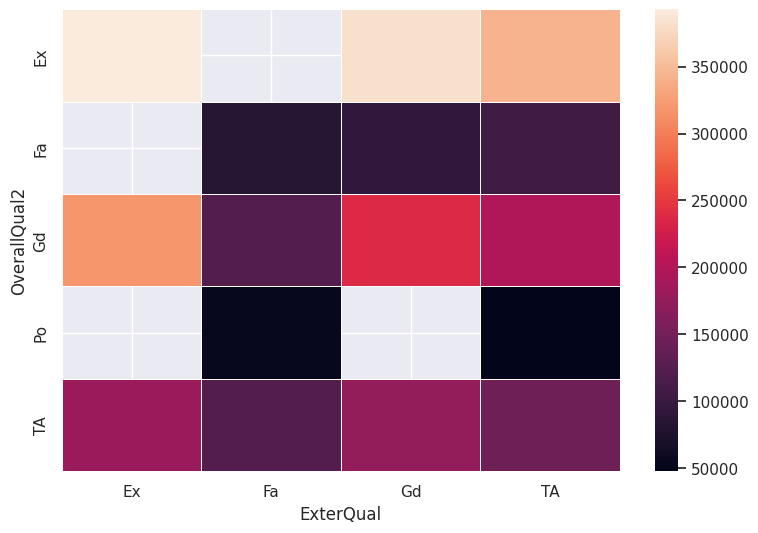

In [ ]:
heatmap = pd.pivot_table(data=df, index='OverallQual2', columns='ExterQual', values='SalePrice')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heatmap, linewidths=.5, ax=ax)
heatmap

<Axes: xlabel='BsmtFinSF1', ylabel='AdjSalePrice'>

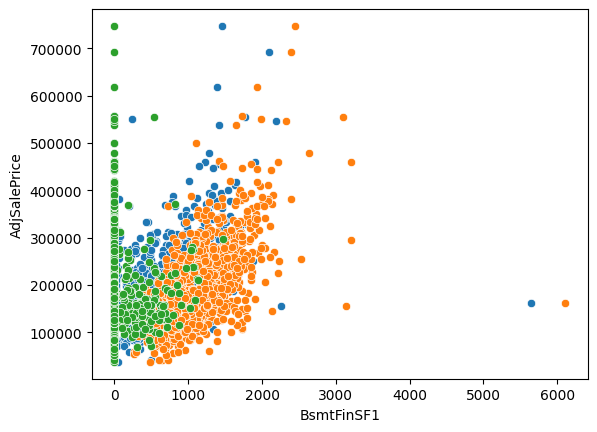

In [ ]:
sns.scatterplot(data = df, x = df['BsmtFinSF1'], y = df['AdjSalePrice'])
sns.scatterplot(data = df, x = df['TotalBsmtSF'], y = df['AdjSalePrice'])
sns.scatterplot(data = df, x = df['BsmtFinSF2'], y = df['AdjSalePrice'])